<a href="https://colab.research.google.com/github/Adnan5153/SubCancelPredition/blob/main/subPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#split(train(70%) & test(30))
#train(SVM)
#testing accurecy point(70%)

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline
data = pd.read_csv('/content/sample_data/customer_churn_dataset-testing-master.csv')
df = pd.DataFrame(data)
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [21]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Subscription Type'] = df['Subscription Type'].replace({'Basic': 1, 'Standard': 2, 'Premium': 3})
df['Contract Length'] = df['Contract Length'].replace({'Monthly': 1, 'Annual': 2, 'Quarterly': 3})

/tmp/ipython-input-3320037688.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
/tmp/ipython-input-3320037688.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Subscription Type'] = df['Subscription Type'].replace({'Basic': 1, 'Standard': 2, 'Premium': 3})
/tmp/ipython-input-3320037688.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(cop

In [22]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,0,25,14,4,27,1,1,598,9,1
1,2,41,0,28,28,7,13,2,1,584,20,0
2,3,47,1,27,10,2,29,3,2,757,21,0
3,4,35,1,9,12,5,17,3,3,232,18,0
4,5,53,0,58,24,9,2,2,2,533,18,0


In [23]:
data.isna().any()

,0
CustomerID,False
Age,False
Gender,False
Tenure,False
Usage Frequency,False
Support Calls,False
Payment Delay,False
Subscription Type,False
Contract Length,False
Total Spend,False


In [24]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CustomerID         64374 non-null  int64
 1   Age                64374 non-null  int64
 2   Gender             64374 non-null  int64
 3   Tenure             64374 non-null  int64
 4   Usage Frequency    64374 non-null  int64
 5   Support Calls      64374 non-null  int64
 6   Payment Delay      64374 non-null  int64
 7   Subscription Type  64374 non-null  int64
 8   Contract Length    64374 non-null  int64
 9   Total Spend        64374 non-null  int64
 10  Last Interaction   64374 non-null  int64
 11  Churn              64374 non-null  int64
dtypes: int64(12)
memory usage: 5.9 MB
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
T

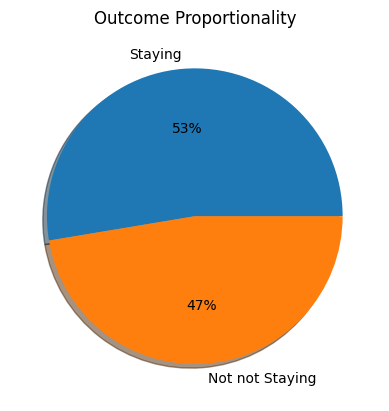

In [25]:
plt.pie(df['Churn'].value_counts(), labels=[
        'Staying', 'Not not Staying'], autopct='%.f%%', shadow=True)
plt.title('Outcome Proportionality')
plt.show()

# Data Preproseccing

In [26]:
# df.dropna(inplace=True)
# df
# df.isna().any()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CustomerID         64374 non-null  int64
 1   Age                64374 non-null  int64
 2   Gender             64374 non-null  int64
 3   Tenure             64374 non-null  int64
 4   Usage Frequency    64374 non-null  int64
 5   Support Calls      64374 non-null  int64
 6   Payment Delay      64374 non-null  int64
 7   Subscription Type  64374 non-null  int64
 8   Contract Length    64374 non-null  int64
 9   Total Spend        64374 non-null  int64
 10  Last Interaction   64374 non-null  int64
 11  Churn              64374 non-null  int64
dtypes: int64(12)
memory usage: 5.9 MB


In [28]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,0,25,14,4,27,1,1,598,9,1
1,2,41,0,28,28,7,13,2,1,584,20,0
2,3,47,1,27,10,2,29,3,2,757,21,0
3,4,35,1,9,12,5,17,3,3,232,18,0
4,5,53,0,58,24,9,2,2,2,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,0,33,12,6,21,1,3,947,14,1
64370,64371,37,1,6,1,5,22,2,2,923,9,1
64371,64372,25,1,39,14,8,30,3,1,327,20,1
64372,64373,50,0,18,19,7,22,2,1,540,13,1


# Data Visualization

In [ ]:
# %matplotlib inline
# plt.xlabel("Thickness of the Clumb")
# plt.ylabel("Class")
# plt.scatter(df.Uniformity_of_Cell_Size, df.Class)

# **Split Data**

In [29]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(45061, 11)
(19313, 11)
(45061,)
(19313,)


In [32]:
X_train

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
27180,27181,42,0,17,23,2,24,3,3,862,25
50679,50680,65,0,36,3,10,15,2,2,779,24
43995,43996,31,0,56,6,3,0,3,2,238,3
16737,16738,46,0,29,28,6,20,2,2,399,18
46609,46610,25,1,33,12,7,25,2,2,636,10
...,...,...,...,...,...,...,...,...,...,...,...
28017,28018,41,1,33,8,2,15,3,2,559,14
50496,50497,46,0,1,5,10,24,1,3,292,21
29199,29200,45,0,45,19,7,17,2,2,421,6
40061,40062,64,0,14,21,4,17,1,2,414,5


In [33]:
X_test

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
13007,13008,57,0,49,5,10,29,1,2,102,18
58608,58609,49,0,3,10,8,25,1,1,738,15
24489,24490,58,0,29,17,7,7,2,1,999,14
3258,3259,60,1,44,14,2,30,2,1,317,22
26205,26206,23,1,44,17,3,9,3,3,834,15
...,...,...,...,...,...,...,...,...,...,...,...
53272,53273,52,1,33,3,10,24,1,1,788,24
58597,58598,23,0,31,21,5,25,3,2,837,10
43039,43040,43,0,39,29,4,29,3,3,892,3
19824,19825,21,1,9,28,8,3,1,3,588,19


In [34]:
y_train

,Churn
27180,0
50679,1
43995,0
16737,1
46609,1
...,...
28017,0
50496,1
29199,1
40061,0


In [35]:
y_test

,Churn
13007,1
58608,1
24489,0
3258,0
26205,0
...,...
53272,1
58597,1
43039,0
19824,0


# Algorithm DecisionTreeClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

# Creating the classifier object
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)

# Performing training
clf_gini.fit(X_train, y_train)
# return clf_gini

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

# Accurecy Test

In [38]:
from sklearn.metrics import accuracy_score, classification_report

myPrediction=clf_gini.predict(X_test)
str(accuracy_score(y_test,myPrediction)*100)+"%"

'89.91870760627556%'

In [39]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, myPrediction)
print(f"F1 Score: {f1}")

F1 Score: 0.8941560206577874


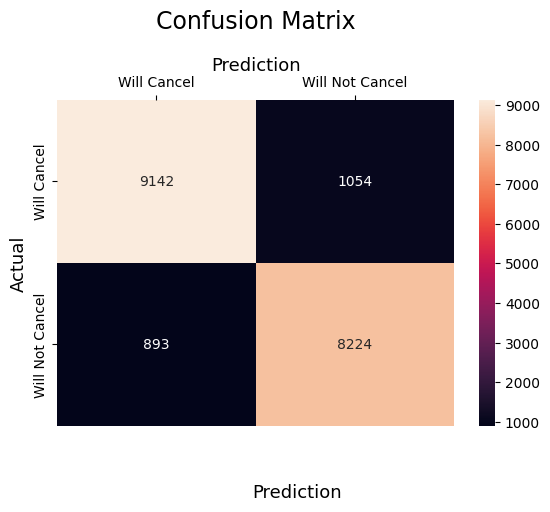

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, myPrediction)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Will Cancel','Will Not Cancel'],
            yticklabels=['Will Cancel','Will Not Cancel'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()